In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
data = pd.read_csv('turnstile_191123.txt')

In [4]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472


In [5]:
data.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [6]:
trainDF = pd.DataFrame(data=data)

In [7]:
trainDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472


In [8]:
trainDF.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205527,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,04:00:00,REGULAR,5554,420
205528,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,08:00:00,REGULAR,5554,420
205529,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,12:00:00,REGULAR,5554,420
205530,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,16:00:00,REGULAR,5554,420
205531,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,20:00:00,REGULAR,5554,420


In [7]:
trainDF.to_csv('train.csv',index=False)

In [8]:
trainDF.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
trainDF.columns = trainDF.columns.str.strip()

In [10]:
trainDF.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
trainDF.duplicated().value_counts();

In [12]:
trainDF.info

<bound method DataFrame.info of           C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0        A002  R051  02-00-00          59 ST  NQR456W      BMT  11/16/2019   
1        A002  R051  02-00-00          59 ST  NQR456W      BMT  11/16/2019   
2        A002  R051  02-00-00          59 ST  NQR456W      BMT  11/16/2019   
3        A002  R051  02-00-00          59 ST  NQR456W      BMT  11/16/2019   
4        A002  R051  02-00-00          59 ST  NQR456W      BMT  11/16/2019   
...       ...   ...       ...            ...      ...      ...         ...   
205527  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/22/2019   
205528  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/22/2019   
205529  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/22/2019   
205530  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/22/2019   
205531  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/22/2019   

            TIME     DESC  ENTR

In [13]:
trainDF['TIMESTAMP'] = pd.to_datetime((trainDF.DATE + ' ' + trainDF.TIME), format='%m/%d/%Y %H:%M:%S')

In [14]:
trainDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230,2019-11-16 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248,2019-11-16 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341,2019-11-16 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412,2019-11-16 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472,2019-11-16 19:00:00


In [15]:
import datetime as dt

days = ['MON','TUE','WED','THU','FRI','SAT','SUN']

trainDF['DAY'] = [days[dt.datetime.strptime(dstring,'%m/%d/%Y').weekday()] for dstring in trainDF.DATE.tolist()]

In [16]:
trainDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230,2019-11-16 03:00:00,SAT
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248,2019-11-16 07:00:00,SAT
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341,2019-11-16 11:00:00,SAT
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412,2019-11-16 15:00:00,SAT
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472,2019-11-16 19:00:00,SAT


In [17]:
trainDF.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
TIMESTAMP    datetime64[ns]
DAY                  object
dtype: object

In [18]:
trainDF.reset_index()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP,DAY
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230,2019-11-16 03:00:00,SAT
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248,2019-11-16 07:00:00,SAT
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341,2019-11-16 11:00:00,SAT
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412,2019-11-16 15:00:00,SAT
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472,2019-11-16 19:00:00,SAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205527,205527,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,04:00:00,REGULAR,5554,420,2019-11-22 04:00:00,FRI
205528,205528,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,08:00:00,REGULAR,5554,420,2019-11-22 08:00:00,FRI
205529,205529,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,12:00:00,REGULAR,5554,420,2019-11-22 12:00:00,FRI
205530,205530,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/22/2019,16:00:00,REGULAR,5554,420,2019-11-22 16:00:00,FRI


In [19]:
trainDF.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [20]:
l = [''.join(sorted(a)) for a in trainDF['LINENAME']] 

In [21]:
trainDF['STATID']=trainDF['STATION']+ '__' + pd.Series(l)

In [22]:
bins = [-1,3,7,11,15,19,24] 

trainDF['HOUR'] = [r.hour for r in trainDF.TIMESTAMP]#.astype(int) 
trainDF['HOURBIN'] = pd.cut(trainDF['HOUR'], bins)
#trainDF = np.array(data, dtype=np.float32)

In [23]:
#trainDF['ENTRY_DIFF']=trainDF.groupby(['STATID','UNIT','SCP'],as_index=False)['ENTRIES'].transform(pd.Series.diff)['ENTRIES']

In [24]:
#trainDF['EXIT_DIFF']=trainDF.groupby(['STATID','UNIT','SCP'],as_index=False)['EXITS'].transform(pd.Series.diff)['EXITS']

In [25]:
trainDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP,DAY,STATID,HOUR,HOURBIN
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,03:00:00,REGULAR,7274557,2465230,2019-11-16 03:00:00,SAT,59 ST__456NQRW,3,"(-1, 3]"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,07:00:00,REGULAR,7274566,2465248,2019-11-16 07:00:00,SAT,59 ST__456NQRW,7,"(3, 7]"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,11:00:00,REGULAR,7274640,2465341,2019-11-16 11:00:00,SAT,59 ST__456NQRW,11,"(7, 11]"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,15:00:00,REGULAR,7274821,2465412,2019-11-16 15:00:00,SAT,59 ST__456NQRW,15,"(11, 15]"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/16/2019,19:00:00,REGULAR,7275162,2465472,2019-11-16 19:00:00,SAT,59 ST__456NQRW,19,"(15, 19]"


In [26]:
trainDF = trainDF.drop(['C/A','UNIT','SCP','DIVISION','DESC',"DATE",'TIME'], axis=1)

In [27]:
trainDF.head()

,STATION,LINENAME,ENTRIES,EXITS,TIMESTAMP,DAY,STATID,HOUR,HOURBIN
0,59 ST,NQR456W,7274557,2465230,2019-11-16 03:00:00,SAT,59 ST__456NQRW,3,"(-1, 3]"
1,59 ST,NQR456W,7274566,2465248,2019-11-16 07:00:00,SAT,59 ST__456NQRW,7,"(3, 7]"
2,59 ST,NQR456W,7274640,2465341,2019-11-16 11:00:00,SAT,59 ST__456NQRW,11,"(7, 11]"
3,59 ST,NQR456W,7274821,2465412,2019-11-16 15:00:00,SAT,59 ST__456NQRW,15,"(11, 15]"
4,59 ST,NQR456W,7275162,2465472,2019-11-16 19:00:00,SAT,59 ST__456NQRW,19,"(15, 19]"


In [28]:
grd_cntrl_st_data = trainDF.loc[trainDF.STATION == 'GRD CNTRL-42 ST']

In [29]:
grd_cntrl_st_data.head()

,STATION,LINENAME,ENTRIES,EXITS,TIMESTAMP,DAY,STATID,HOUR,HOURBIN
157605,GRD CNTRL-42 ST,4567S,2266959,6043984,2019-11-16 00:00:00,SAT,GRD CNTRL-42 ST__4567S,0,"(-1, 3]"
157606,GRD CNTRL-42 ST,4567S,2266962,6043985,2019-11-16 04:00:00,SAT,GRD CNTRL-42 ST__4567S,4,"(3, 7]"
157607,GRD CNTRL-42 ST,4567S,2266971,6044043,2019-11-16 08:00:00,SAT,GRD CNTRL-42 ST__4567S,8,"(7, 11]"
157608,GRD CNTRL-42 ST,4567S,2267042,6044303,2019-11-16 12:00:00,SAT,GRD CNTRL-42 ST__4567S,12,"(11, 15]"
157609,GRD CNTRL-42 ST,4567S,2267180,6044556,2019-11-16 16:00:00,SAT,GRD CNTRL-42 ST__4567S,16,"(15, 19]"


In [30]:
grd_cntrl_st_data.to_csv(r'grd_cntrl_st_data.csv')


In [31]:
penn_sta_data = trainDF.loc[trainDF.STATION == '34 ST-PENN STA']

In [32]:
penn_sta_data.to_csv(r'penn_sta_data.csv')

In [33]:
penn_sta_data.head()

,STATION,LINENAME,ENTRIES,EXITS,TIMESTAMP,DAY,STATID,HOUR,HOURBIN
53642,34 ST-PENN STA,ACE,124573,381163,2019-11-16 03:00:00,SAT,34 ST-PENN STA__ACE,3,"(-1, 3]"
53643,34 ST-PENN STA,ACE,124580,381198,2019-11-16 07:00:00,SAT,34 ST-PENN STA__ACE,7,"(3, 7]"
53644,34 ST-PENN STA,ACE,124621,381383,2019-11-16 11:00:00,SAT,34 ST-PENN STA__ACE,11,"(7, 11]"
53645,34 ST-PENN STA,ACE,124720,381624,2019-11-16 15:00:00,SAT,34 ST-PENN STA__ACE,15,"(11, 15]"
53646,34 ST-PENN STA,ACE,124830,381892,2019-11-16 19:00:00,SAT,34 ST-PENN STA__ACE,19,"(15, 19]"


In [34]:
uni_sq_data = trainDF.loc[trainDF.STATION == '14 ST-UNION SQ']

In [35]:
uni_sq_data.to_csv(r'uni_sq_data.csv')

In [36]:
times_sq_data = trainDF.loc[trainDF.STATION == 'TIMES SQ-42 ST']

In [37]:
times_sq_data.to_csv(r'times_sq_data.csv')

In [38]:
times_sq_data.tail()

,STATION,LINENAME,ENTRIES,EXITS,TIMESTAMP,DAY,STATID,HOUR,HOURBIN
139498,TIMES SQ-42 ST,1237ACENQRSW,8592822,2760259,2019-11-22 07:00:00,FRI,TIMES SQ-42 ST__1237ACENQRSW,7,"(3, 7]"
139499,TIMES SQ-42 ST,1237ACENQRSW,8593763,2760573,2019-11-22 11:00:00,FRI,TIMES SQ-42 ST__1237ACENQRSW,11,"(7, 11]"
139500,TIMES SQ-42 ST,1237ACENQRSW,8594303,2760813,2019-11-22 15:00:00,FRI,TIMES SQ-42 ST__1237ACENQRSW,15,"(11, 15]"
139501,TIMES SQ-42 ST,1237ACENQRSW,8595281,2761147,2019-11-22 19:00:00,FRI,TIMES SQ-42 ST__1237ACENQRSW,19,"(15, 19]"
139502,TIMES SQ-42 ST,1237ACENQRSW,8596153,2761328,2019-11-22 23:00:00,FRI,TIMES SQ-42 ST__1237ACENQRSW,23,"(19, 24]"


In [39]:
(times_sq_data.dtypes)

STATION              object
LINENAME             object
ENTRIES               int64
EXITS                 int64
TIMESTAMP    datetime64[ns]
DAY                  object
STATID               object
HOUR                  int64
HOURBIN            category
dtype: object

In [40]:
times_sq_data.columns

Index(['STATION', 'LINENAME', 'ENTRIES', 'EXITS', 'TIMESTAMP', 'DAY', 'STATID',
       'HOUR', 'HOURBIN'],
      dtype='object')

In [41]:
times_sq_data = times_sq_data.groupby(['STATION','HOUR']).sum()

In [42]:
times_sq_data.to_csv(r'times_sq_data.csv', index=False)
times_sq_data

ENTRIES        EXITS
STATION        HOUR                          
TIMES SQ-42 ST 3     39726384253  31271623049
               7     39868378531  31292276103
               11    39866475549  31291695894
               15    39628235997  31281184695
               19    39748618538  31287056447
               23    39733808587  31266175412

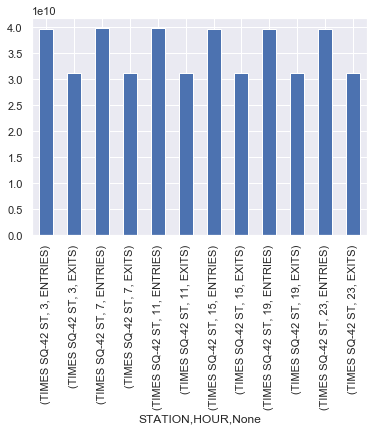

In [46]:
times_sq_data.stack(level=0).plot(kind='');

In [44]:
df = pd.read_csv('times_sq_data.csv')
df.head()

,ENTRIES,EXITS
0,39726384253,31271623049
1,39868378531,31292276103
2,39866475549,31291695894
3,39628235997,31281184695
4,39748618538,31287056447


In [45]:
df.head()

,ENTRIES,EXITS
0,39726384253,31271623049
1,39868378531,31292276103
2,39866475549,31291695894
3,39628235997,31281184695
4,39748618538,31287056447


In [46]:
df.dtypes

ENTRIES    int64
EXITS      int64
dtype: object